In [35]:
# Copyright Tay Zhi Cong, year 2025

import random
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math
import sys
np.set_printoptions(threshold=sys.maxsize)


#### form a 23-tap low-pass half-band filter

In [36]:
n = np.arange(-5.5, 6, 0.5) 
h = np.sinc(n)

#### stem the impulse response, plot the magnitude spectrum and then the log magnitude spectrum

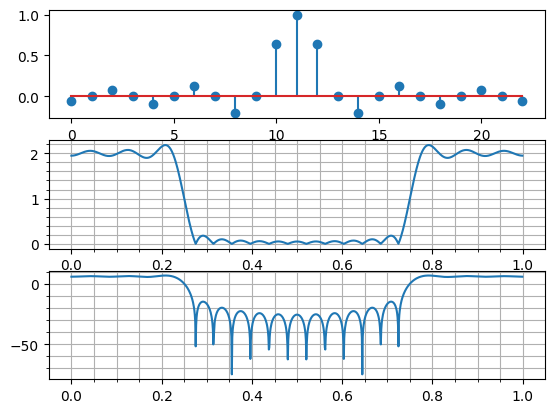

In [37]:
ax1 = plt.subplot(3,1,1)
ax1.stem(h)
ff = np.arange(0, 1, 1/1024) * 1
freq_response = abs(np.fft.fft(h, 1024))
log_magnitude_freq_response = 20*np.log10(abs(np.fft.fft(h, 1024)))
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, freq_response)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, log_magnitude_freq_response)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")

#### DC gain of the filter is approximately 2

#### Sum the impulse response to get the appropriate scale factor to apply to the impulse response to set the DC gain to unity

In [38]:
print("sum of the impulse response is", sum(h))

sum of the impulse response is 1.9473049195749639


#### the location of the impulse response zeros are multiples of 2, except at its highest peak

#### Scale the impulse response and replot it

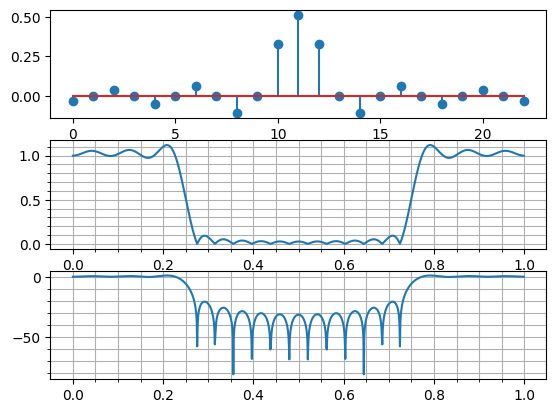

In [39]:
h = h/sum(h)
ax1 = plt.subplot(3,1,1)
ax1.stem(h)
ff = np.arange(0, 1, 1/1024) * 1
freq_response = abs(np.fft.fft(h, 1024))
log_magnitude_freq_response = 20*np.log10(abs(np.fft.fft(h, 1024)))
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, freq_response)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, log_magnitude_freq_response)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")

####  the length of the filter to set the first sample to zero

To set the first sample to zero, the length of the filter minus 1, N - 1, divided by 2 must be even.

In solution to 8_1, N is 21 and (N-1)/2 is even, therefore its first sample is zero.

In solution to 8_2, N is 23 and (N-1)/2 is odd, therefore its first sample is not zero.


#### Extra investigation: Effects of prepended and appended zeros on the frequency response of half-band filter

[ 0.00000000e+00 -2.97203197e-02  2.00182919e-17  3.63248352e-02
 -2.00182919e-17 -4.67033595e-02  2.00182919e-17  6.53847033e-02
 -2.00182919e-17 -1.08974506e-01  2.00182919e-17  3.26923517e-01
  5.13530259e-01  3.26923517e-01  2.00182919e-17 -1.08974506e-01
 -2.00182919e-17  6.53847033e-02  2.00182919e-17 -4.67033595e-02
 -2.00182919e-17  3.63248352e-02  2.00182919e-17 -2.97203197e-02
  0.00000000e+00]
[ 0.00000000e+00  0.00000000e+00  2.22044605e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.22044605e-16
 -2.22044605e-16  2.22044605e-16  0.00000000e+00  0.00000000e+00
 -4.44089210e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22044605e-16  0.00000000e+00  2.22044605e-16  2.22044605e-16
  2.22044605e-16  2.22044605e-16 -4.44089210e-16  0.00000000e+00
  2.22044605e-16  0.00000000e+00  0.00000000e+00  2.22044605e-16
 -4.44089210e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.000

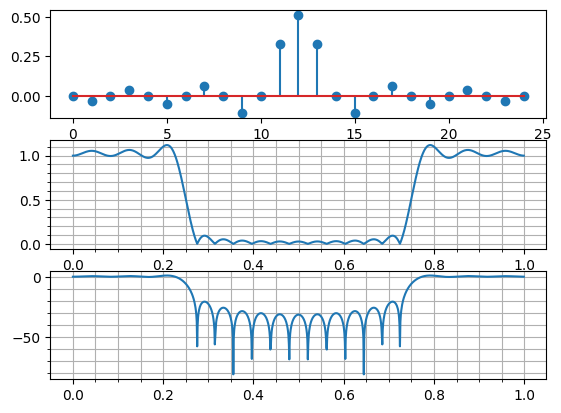

In [45]:
h_with_zeros = np.concatenate((np.array([0]), h, np.array([0])))
print(h_with_zeros)
ax1 = plt.subplot(3,1,1)
ax1.stem(h_with_zeros)
ff = np.arange(0, 1, 1/1024) * 1
freq_response2 = abs(np.fft.fft(h_with_zeros, 1024))
log_magnitude_freq_response2 = 20*np.log10(abs(np.fft.fft(h_with_zeros, 1024)))
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, freq_response2)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, log_magnitude_freq_response2)
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
print(freq_response2 - freq_response)